# 1. Install Dependencies and Setup

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
import tensorflow as tf
import os

2023-08-29 09:36:21.881755: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-29 09:36:21.907091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-29 09:36:28.597664: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

2023-08-29 10:05:33.137045: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 10:05:33.156755: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 10:05:33.156871: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr

/tmp/ipykernel_855338/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [17]:
data_dir = 'data/UoA-DR/' 

# Function to check if a string contains only digits and ends with '.jpg'
def is_retinal_only(file_name):
    return file_name[:-4].isdigit() and file_name.endswith(".jpg")

for image_folder in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_folder)):
        if is_retinal_only(image):
            print(image[:-4])
            print(image)

37
37.jpg
131
131.jpg
19
19.jpg
198
198.jpg
156
156.jpg
61
61.jpg
84
84.jpg
17
17.jpg
46
46.jpg
132
132.jpg
183
183.jpg
161
161.jpg
103
103.jpg
195
195.jpg
90
90.jpg
164
164.jpg
144
144.jpg
113
113.jpg
116
116.jpg
102
102.jpg
187
187.jpg
180
180.jpg
25
25.jpg
143
143.jpg
160
160.jpg
154
154.jpg
77
77.jpg
114
114.jpg
130
130.jpg
151
151.jpg
121
121.jpg
35
35.jpg
82
82.jpg
6
6.jpg
69
69.jpg
18
18.jpg
101
101.jpg
34
34.jpg
171
171.jpg
85
85.jpg
55
55.jpg
100
100.jpg
192
192.jpg
124
124.jpg
81
81.jpg
52
52.jpg
42
42.jpg
193
193.jpg
166
166.jpg
127
127.jpg
148
148.jpg
169
169.jpg
123
123.jpg
142
142.jpg
134
134.jpg
64
64.jpg
68
68.jpg
44
44.jpg
93
93.jpg
104
104.jpg
128
128.jpg
163
163.jpg
194
194.jpg
176
176.jpg
197
197.jpg
110
110.jpg
157
157.jpg
78
78.jpg
24
24.jpg
2
2.jpg
21
21.jpg
125
125.jpg
138
138.jpg
191
191.jpg
48
48.jpg
63
63.jpg
147
147.jpg
20
20.jpg
23
23.jpg
14
14.jpg
167
167.jpg
112
112.jpg
74
74.jpg
62
62.jpg
181
181.jpg
133
133.jpg
87
87.jpg
135
135.jpg
137
137.jpg
159
159.

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [83]:
classes_dict = { 
    "NPDR": {*range(1, 82), *range(83, 95), 130, *range(132, 144), *range(168, 170), *range(171, 175), 179, 193},
    "PDR": {82, *range(95, 101), 131, 167, *range(176, 179), *range(182, 193), *range(194, 201)},
    "Healthy": {*range(101, 130), *range(144, 167), 170, 175, *range(180, 182)}
}

for image_class in classes_dict.keys():
    # Create the new folder if it doesn't exist
    new_folder = os.path.join(data_dir, image_class)
    os.makedirs(new_folder, exist_ok=True)

def find_class(file_name):
    image_number = file_name[:-4]
    
    for image_class, value_set in classes_dict.items():
        if int(image_number) in value_set:
            print(f"The associated key for {image_number} is: {image_class}")
            break
    else:
        print(f"No associated key found for {image_number}")
    
    return image_class
    

# Function to check if a string contains only digits and ends with '.jpg'
def is_retinal_only(file_name):
    return file_name[:-4].isdigit() and file_name.endswith(".jpg")

for image_folder in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_folder)):
        if is_retinal_only(image):
            image_class = find_class(image)

            # Move the image to the new folder
            original_image_path = os.path.join(data_dir, image_folder, image)
            new_image_path = os.path.join(data_dir, image_class, image)
            os.rename(original_image_path, new_image_path)
            
            print("Original Path:", original_image_path)
            print("New Path:", new_image_path)

The associated key for 37 is: NPDR
Original Path: data/UoA-DR/37/37.jpg
New Path: data/UoA-DR/NPDR/37.jpg
The associated key for 131 is: PDR
Original Path: data/UoA-DR/131/131.jpg
New Path: data/UoA-DR/PDR/131.jpg
The associated key for 19 is: NPDR
Original Path: data/UoA-DR/19/19.jpg
New Path: data/UoA-DR/NPDR/19.jpg
The associated key for 198 is: PDR
Original Path: data/UoA-DR/198/198.jpg
New Path: data/UoA-DR/PDR/198.jpg
The associated key for 156 is: Healthy
Original Path: data/UoA-DR/156/156.jpg
New Path: data/UoA-DR/Healthy/156.jpg
The associated key for 61 is: NPDR
Original Path: data/UoA-DR/61/61.jpg
New Path: data/UoA-DR/NPDR/61.jpg
The associated key for 84 is: NPDR
Original Path: data/UoA-DR/84/84.jpg
New Path: data/UoA-DR/NPDR/84.jpg
The associated key for 17 is: NPDR
Original Path: data/UoA-DR/17/17.jpg
New Path: data/UoA-DR/NPDR/17.jpg
The associated key for 46 is: NPDR
Original Path: data/UoA-DR/46/46.jpg
New Path: data/UoA-DR/NPDR/46.jpg
The associated key for 132 is: N

In [32]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [33]:
import numpy as np
from matplotlib import pyplot as plt

In [73]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 199 files belonging to 3 classes.


In [74]:
data_iterator = data.as_numpy_iterator()

In [75]:
batch = data_iterator.next()

File Path: data/UoA-DR/Healthy/114.jpg
File Path: data/UoA-DR/PDR/122.jpg
File Path: data/UoA-DR/NPDR/89.jpg
File Path: data/UoA-DR/NPDR/89.jpg


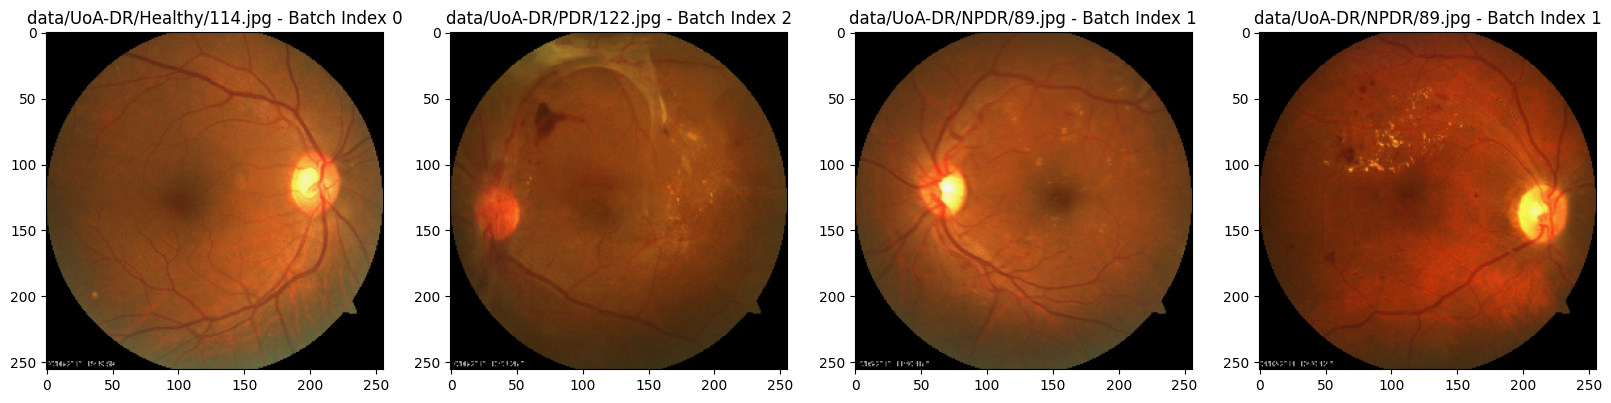

In [82]:
class_labels = data.class_names  # Get the class labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))

    # Construct and print the file path
    image_class = class_labels[batch[1][idx]]
    image_filename = os.path.basename(data.file_paths[batch[1][idx]])
    file_path = os.path.join(data_dir, image_class, image_filename)
    print("File Path:", file_path)

    # Set the title with class label and batch index
    title = f"{file_path} - Batch Index {batch[1][idx]}"
    ax[idx].set_title(title)



plt.show()

0
1
2
3


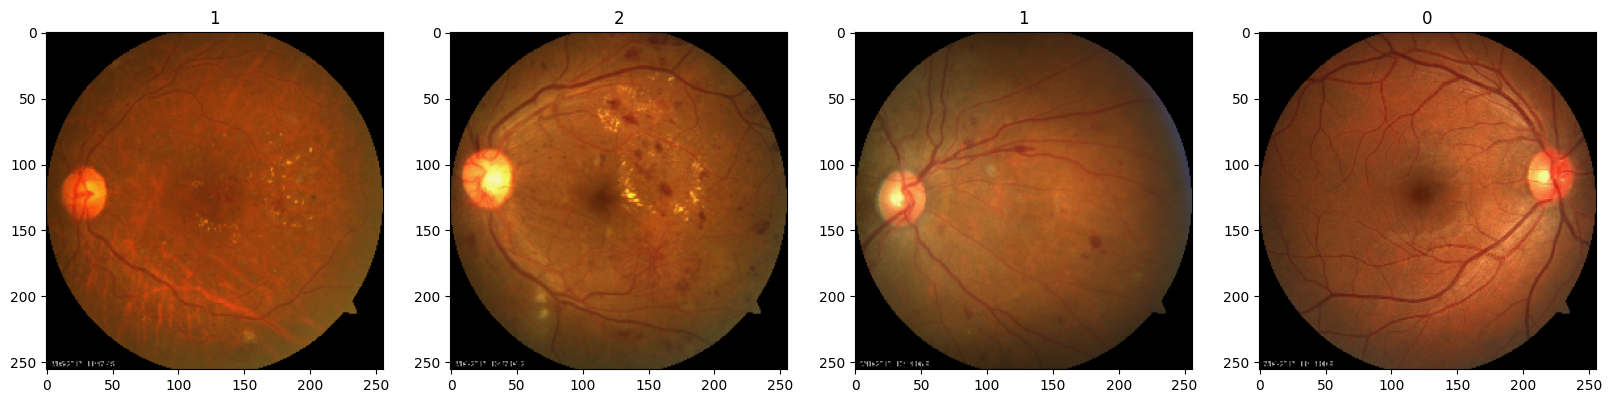

In [39]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    print(idx)
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [41]:
data = data.map(lambda x,y: (x/255, y))

In [42]:
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.01537894, 0.01537894, 0.01537894],
          [0.06603

# 5. Split Data

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [44]:
train_size

4

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [46]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [48]:
model = Sequential()

In [49]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [50]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [52]:
logdir='logs'

In [53]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [54]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2023-08-29 10:57:52.142901: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-29 10:57:52.948254: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-29 10:57:53.154069: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdaa48cb860 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-29 10:57:53.154115: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2023-08-29 10:57:53.163943: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-29 10:57:53.239592: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the p

4/4 [==============================] - 5s 234ms/step - loss: 0.6599 - accuracy: 0.5391 - val_loss: 0.8391 - val_accuracy: 0.5625
Epoch 2/20
4/4 [==============================] - 1s 214ms/step - loss: 0.3676 - accuracy: 0.6250 - val_loss: 0.2590 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 1s 205ms/step - loss: 0.3989 - accuracy: 0.5703 - val_loss: 0.5268 - val_accuracy: 0.4062
Epoch 4/20
4/4 [==============================] - 1s 212ms/step - loss: 0.2998 - accuracy: 0.5547 - val_loss: 0.2744 - val_accuracy: 0.6875
Epoch 5/20
4/4 [==============================] - 1s 204ms/step - loss: 0.2096 - accuracy: 0.5781 - val_loss: 0.0205 - val_accuracy: 0.5312
Epoch 6/20
4/4 [==============================] - 1s 194ms/step - loss: 0.2660 - accuracy: 0.6094 - val_loss: 0.5648 - val_accuracy: 0.5312
Epoch 7/20
4/4 [==============================] - 1s 206ms/step - loss: 0.2560 - accuracy: 0.6719 - val_loss: -0.5617 - val_accuracy: 0.6250
Epoch 8/20
4/4 [==============

In [55]:
print("TensorFlow GPU available:", tf.test.is_gpu_available())


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
TensorFlow GPU available: True


2023-08-29 10:58:36.125525: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 10:58:36.125664: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-29 10:58:36.125716: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# 8. Plot Performance

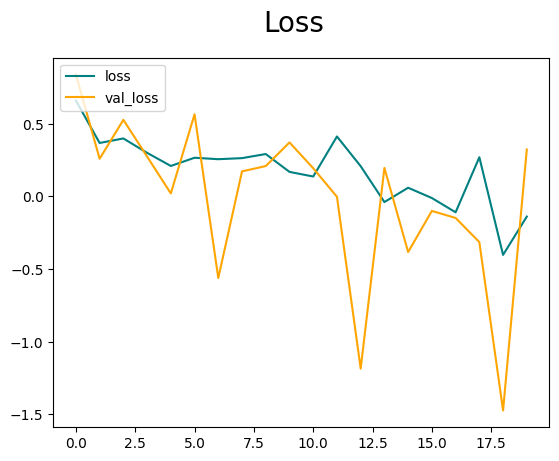

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

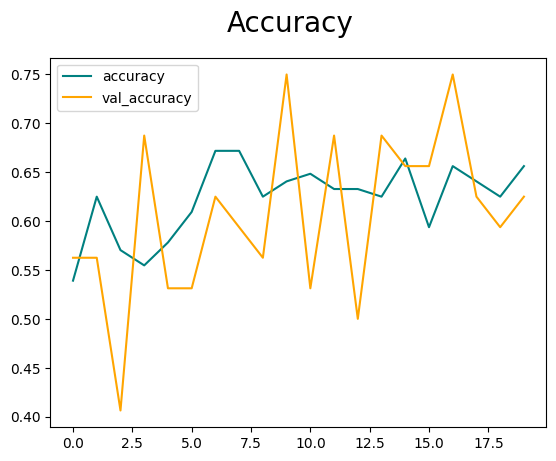

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [61]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [62]:
import cv2

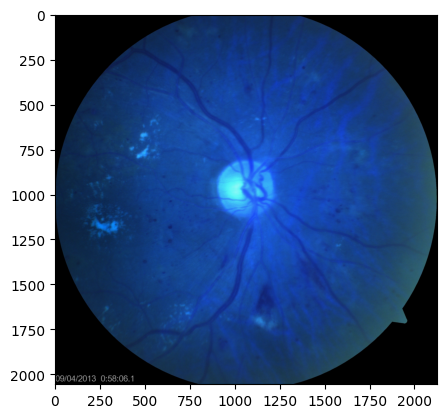

In [63]:
img = cv2.imread('./1.jpg')
plt.imshow(img)
plt.show()

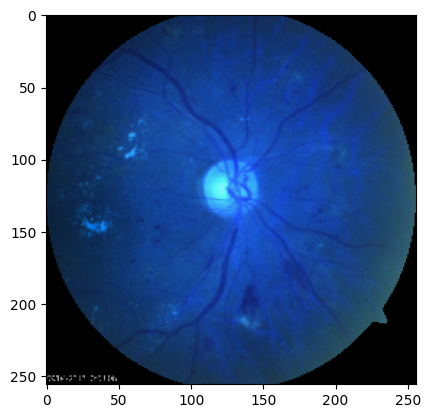

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 100ms/step


In [66]:
yhat

array([[0.00272147]], dtype=float32)

In [67]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [61]:
from tensorflow.keras.models import load_model

In [62]:
model.save(os.path.join('models','imageclassifier.h5'))

/csse/users/yyu69/Desktop/SENG402/trying image classification tuts/Deep-Learning-Image-Classifier/image-classification-venv/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
new_model = load_model('./models/imageclassifier.h5')

In [68]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 38ms/step


array([[0.22750142]], dtype=float32)